In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [146]:
N = 10
X = np.linspace(-5,5,N)

K = np.ones(3)/3

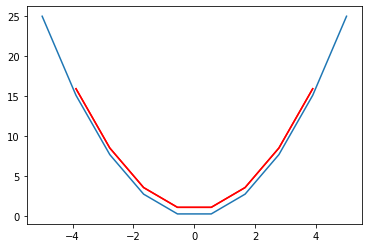

In [147]:
plt.plot(X,X**2)
plt.plot(np.convolve(X,K)[2:-2], np.convolve(X*X, K)[2:-2], 'r')
plt.plot(np.convolve(X,K)[2:-2], np.convolve(X*X, K)[2:-2], 'r')

## without clipping

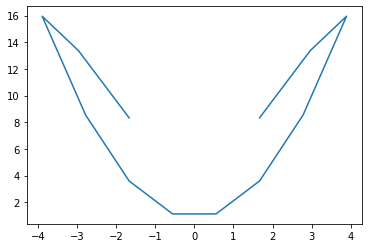

In [148]:
K = np.ones(3)/3

plt.plot(np.convolve(X,K), np.convolve(X*X, K))

In [152]:
VK = np.zeros_like(X)
VK[:3] = 1
VK

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [154]:
## convolution is an operator 

In [153]:
MK = np.vstack([np.roll(VK, N-1 + k) for k in range(N)])
MK

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [150]:
plt.plot( X, np.dot(MK/3, X*X),'r')
plt.plot(X, X*X);


ValueError: shapes (100,100) and (10,) not aligned: 100 (dim 1) != 10 (dim 0)

In [75]:
mm = np.linalg.inv(MK)*3 
mm


array([[ 1.,  1., -2.,  1.,  1., -2.,  1.,  1., -2.,  1.],
       [ 1.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1., -2.],
       [-2.,  1.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.],
       [ 1., -2.,  1.,  1.,  1., -2.,  1.,  1., -2.,  1.],
       [ 1.,  1., -2.,  1.,  1.,  1., -2.,  1.,  1., -2.],
       [-2.,  1.,  1., -2.,  1.,  1.,  1., -2.,  1.,  1.],
       [ 1., -2.,  1.,  1., -2.,  1.,  1.,  1., -2.,  1.],
       [ 1.,  1., -2.,  1.,  1., -2.,  1.,  1.,  1., -2.],
       [-2.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.,  1.],
       [ 1., -2.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.]])

In [80]:
mm[mm> 0 ] = 0

In [70]:
np.linalg.eigvals(MK/3)

array([-0.33333333, -0.20601133,  0.127322  ,  0.53934466,  1.        ,
        0.872678  ,  0.872678  ,  0.53934466,  0.127322  , -0.20601133])

# Exo

what happens when ```N % 3 = 0```

---

# The edge detection kernel

pour faire simple on va etudier le cas de dimension 1
le noyau est

```np.array([-1,2,-1])```

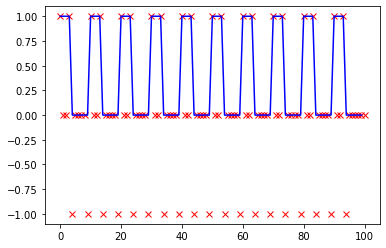

In [142]:
def f(x):
    return x % 10 in [0,1,2,3]

K = np.array([-1,2,-1])

X = np.arange(100).astype(int)
Y = np.zeros_like(X)
Y[[f(k) for k in X  ]] = 1


YK = np.convolve(Y, K)[1:]
plt.plot(np.arange(len(YK)), YK,'rx' )
plt.plot(np.arange(len(Y)), Y, 'b');


In [131]:
VK = np.zeros_like(X)
VK[:3] = K
N = len(X)
MK = np.vstack([np.roll(VK,  k) for k in range(N)])
MK

array([[-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1,  2, -1],
       [-1,  0,  0, ...,  0, -1,  2],
       [ 2, -1,  0, ...,  0,  0, -1]])

## not invertble

In [132]:
np.linalg.det(MK)

-1.1147087742196192e-13

In [133]:
np.linalg.det(MK.astype(int))

-1.1147087742196192e-13

In [136]:
from scipy.linalg import null_space

ker = null_space(MK)
ker.shape

(100, 1)

In [141]:
ker[:,0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [144]:
! ../.g

[master 75cbae9] web
 3 files changed, 457 insertions(+), 9 deletions(-)
 create mode 100644 PROG/.ipynb_checkpoints/conv_kernels-checkpoint.ipynb
 create mode 100644 PROG/conv_kernels.ipynb
Counting objects: 6, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 52.01 KiB | 3.47 MiB/s, done.
Total 6 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   0280973..75cbae9  master -> master


# Regression, gradient descent

In [191]:
X = np.arange(20)
Y = 2*X + (2*np.random.random(20) -1)

In [157]:
Y

array([ 0.12029546,  2.77779422,  4.81808674,  6.27493503,  8.30402597,
       10.6619379 , 12.73988384, 14.98727416, 16.42754004, 18.11018596,
       20.11737445, 22.77416897, 24.23118376, 26.43639386, 28.239591  ,
       30.78213179, 32.4604651 , 34.24248073, 36.69389833, 38.6481937 ])

In [158]:
from scipy import stats

In [167]:
S = stats.linregress(X,Y)

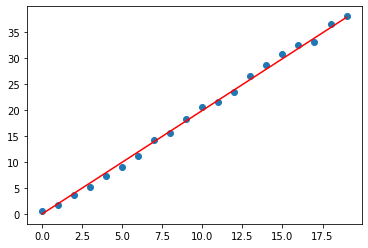

In [192]:
plt.scatter(X,Y);
plt.plot(X[[0,-1]], S.slope*X[[0,-1]] + S.intercept,'r');

In [193]:
 S.slope*X[[0,-1]] + S.intercept

array([-3.93890097e-04,  3.77644587e+01])

In [194]:
S.slope, S.intercept

(1.9876238210820867, -0.0003938900968627479)

In [232]:
A = np.linspace(0,4,10)
B = np.linspace(-4,4, 10)

M = [(a,b) for a in A
           for b in B]

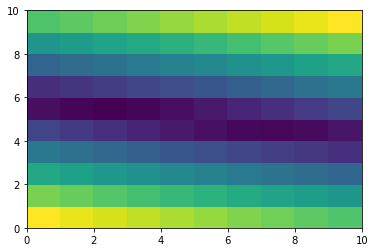

In [237]:
M = [ np.linalg.norm((a*X + b) - Y) for a in A
                                  for b in B]
plt.pcolor(np.array(M).reshape(10,10));


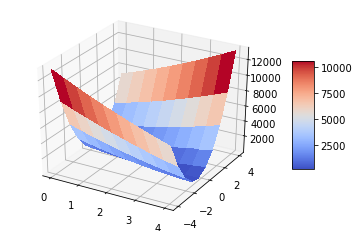

In [241]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
a, b = np.meshgrid(A,B)

# Plot the surface.
surf = ax.plot_surface(a, b , np.array(M).reshape(10,10)**2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [211]:
np.array(M).reshape(10,10)

array([[26.32054419, 25.88839367, 25.4586063 , 25.03130379, 24.60661561,
        24.18467947, 23.76564195, 23.34965912, 22.93689717, 22.52753315],
       [20.84512163, 20.41196547, 19.98177671, 19.55475117, 19.13110069,
        18.71105451, 18.2948609 , 17.88278885, 17.47512992, 17.07220026],
       [15.40307761, 14.96914815, 14.53925102, 14.11375469, 13.6930694 ,
        13.27765246, 12.86801412, 12.4647241 , 12.06841886, 11.67980941],
       [10.04878888,  9.617178  ,  9.19216485,  8.77470818,  8.36593927,
         7.96719544,  7.58005895,  7.20640073,  6.84842728,  6.50872709],
       [ 5.06844854,  4.67894041,  4.31156854,  3.97247911,  3.66952102,
         3.41233145,  3.2119238 ,  3.07940419,  3.0237118 ,  3.04905938],
       [ 3.37458701,  3.50464096,  3.69743238,  3.9437712 ,  4.23432209,
         4.56064282,  4.91561487,  5.29347743,  5.68967171,  6.1006272 ],
       [ 7.62064031,  7.97873345,  8.35105044,  8.73577281,  9.1313327 ,
         9.53638161,  9.94976075, 10.37047398

---


The problem is to find the best **fit**
ie : $a, b \in \mathbb{R}$ which minimise
$ \| a \vec{x} +  b  - \vec{y} \| $.

If $ \|. \| $ is $ \| x \|_2 = \sqrt{ \sum x_i^2} $ then 
$ Q(a,b) = \| a \vec{x} +  b  - \vec{y} \|^2 $

is a quadratic form.


